In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sqlalchemy import create_engine
from urllib.parse import quote_plus

In [2]:
data = pd.read_csv("Students social Media Addiction.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [4]:
data.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [5]:
data.shape

(705, 13)

In [6]:
#Converting column names into snake_case for easy to read and low maintainance
import re
def to_snake_case(column_name):
    column_name = re.sub(r'[^\w\s]', '', column_name)  
    column_name = re.sub(r'\s+', '_', column_name)     
    return column_name.strip().lower()

data.columns = [to_snake_case(col) for col in data.columns]

In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(data[col].value_counts())


Unique values in gender:
gender
Female    353
Male      352
Name: count, dtype: int64

Unique values in academic_level:
academic_level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

Unique values in country:
country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64

Unique values in most_used_platform:
most_used_platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64

Unique values in affects_academic_performance:
affects_academic_performance
Yes    453
No     252
Name: count, dtype: int64

Unique values in relationship_status:
relationship_status
Single             384
In Relationship    289
Complica

In [8]:
usage_bins = [0, 2, 4, 6, 12, 18, 24]
usage_labels = ["0-2", "2-4", "4-6","6-12", "12-18","18-24"]
data["usage_category"] = pd.cut(data["avg_daily_usage_hours"], bins = usage_bins, labels = usage_labels, right = False)

In [9]:
sleep_bins = [0.0, 2.0, 4.0, 6.0, 8.0, 14.0]
sleep_labels = ["Very Poor(0-2h)", "Poor(2-4)", "Moderate(4-6h)", "Good(6-8h)", "Too Much(8-14h)"]
data["sleep_category"] = pd.cut(data["sleep_hours_per_night"], bins = sleep_bins, labels = sleep_labels, right = True)

In [10]:
data.head()

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score,usage_category,sleep_category
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,4-6,Good(6-8h)
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,2-4,Good(6-8h)
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,6-12,Moderate(4-6h)
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,2-4,Good(6-8h)
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,4-6,Moderate(4-6h)


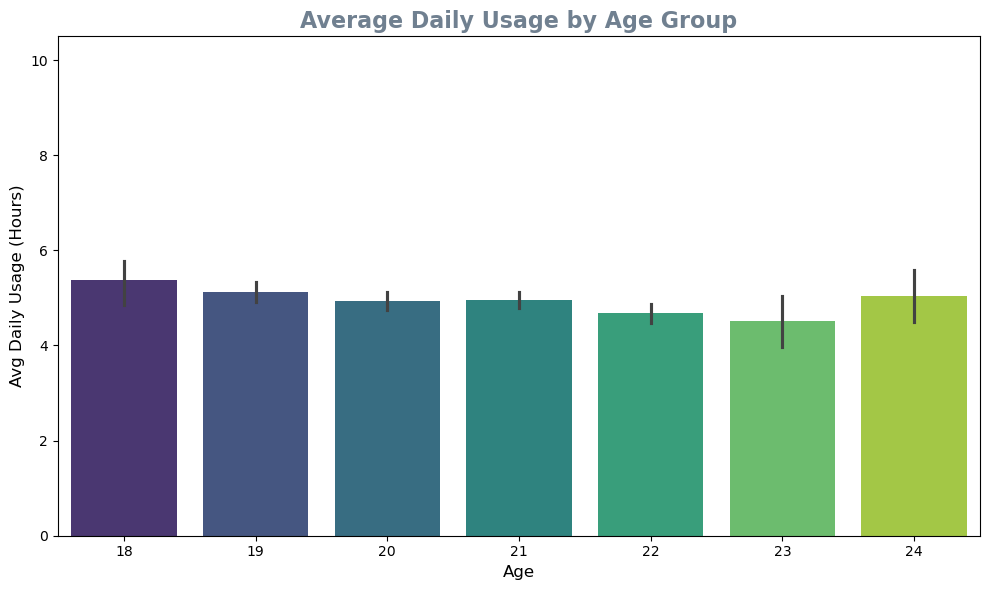

In [11]:
plt.figure(figsize = (10, 6))
sns.barplot(
    data=data,
    x="age",
    y="avg_daily_usage_hours",
    palette="viridis")
plt.title("Average Daily Usage by Age Group", fontsize=16, fontweight='bold', color='slategray')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Avg Daily Usage (Hours)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, data["avg_daily_usage_hours"].max() + 2)
plt.tight_layout()
plt.show()

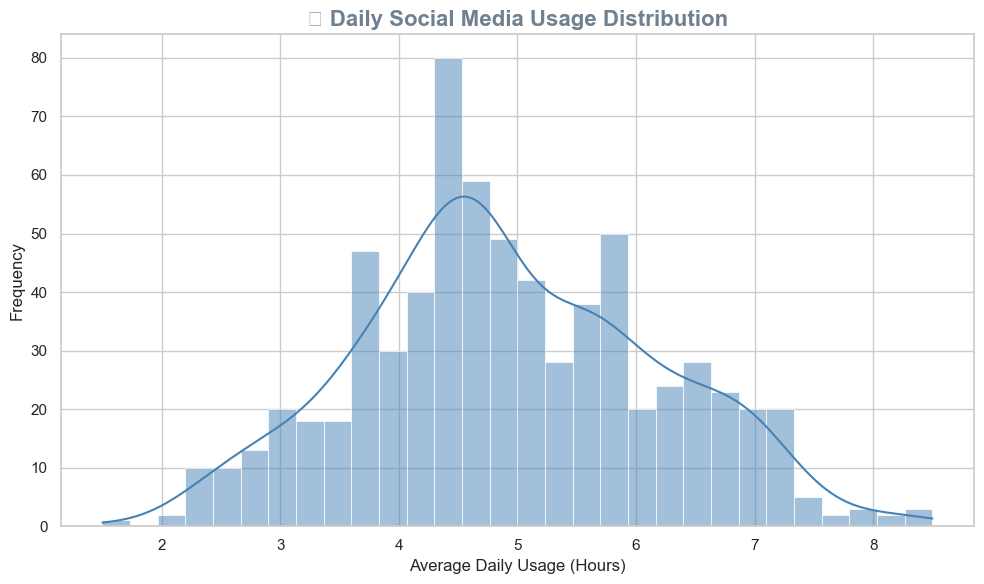

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(
    data["avg_daily_usage_hours"],
    kde=True,
    color="steelblue",
    edgecolor="white",
    bins=30,
    linewidth=0.5)
plt.title("📱 Daily Social Media Usage Distribution", fontsize=16, fontweight='bold', color='slategray')
plt.xlabel("Average Daily Usage (Hours)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

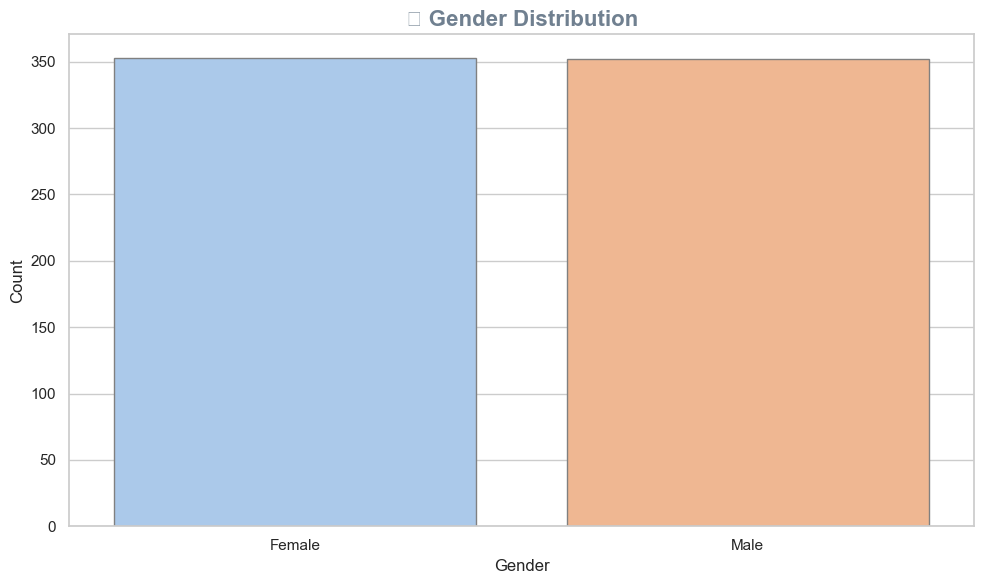

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=data,
    x="gender",
    palette="pastel",
    edgecolor='gray')
plt.title("👥 Gender Distribution", fontsize=16, fontweight='bold', color='slategray')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

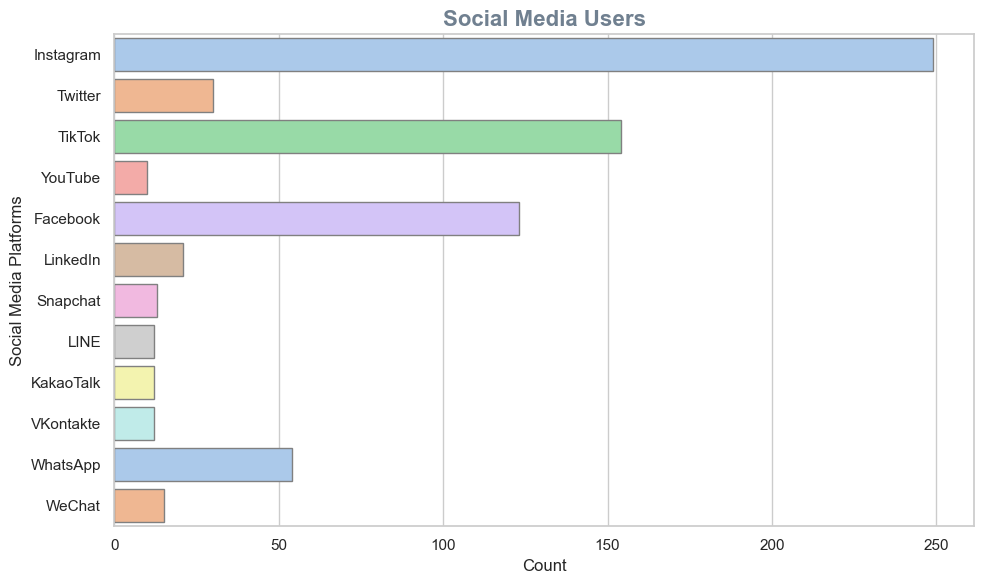

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=data,
    y="most_used_platform",
    palette="pastel",
    edgecolor='gray')
plt.title("Social Media Users", fontsize=16, fontweight='bold', color='slategray')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Social Media Platforms", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

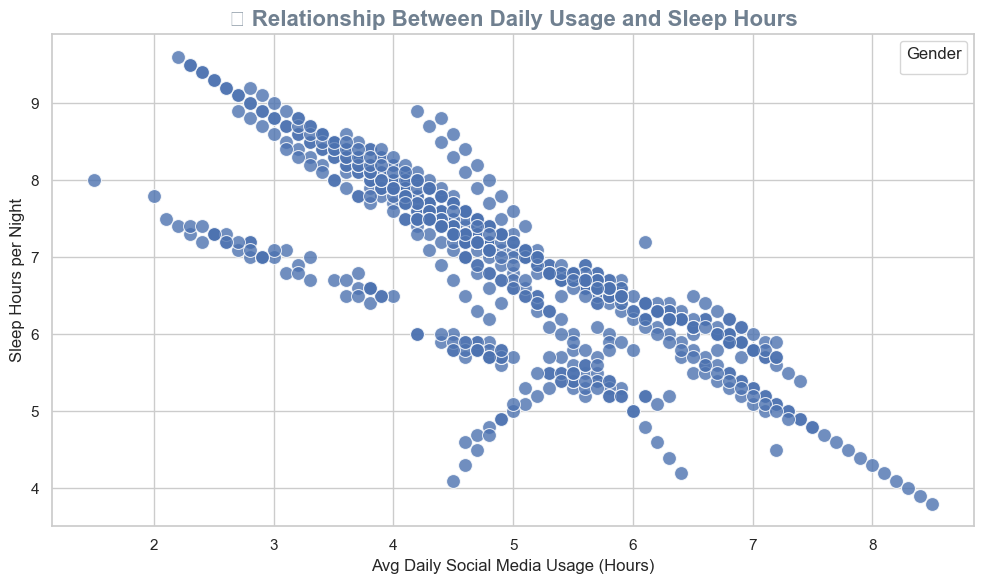

In [15]:
#Analyzing relationship between daily social media usage and sleep hours
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", context="notebook")
sns.scatterplot(
    data=data,
    x="avg_daily_usage_hours",
    y="sleep_hours_per_night",
    palette="Set2", 
    edgecolor='white',
    s=100, 
    alpha=0.8)
plt.title("💡 Relationship Between Daily Usage and Sleep Hours", fontsize=16, fontweight='bold', color='slategray')
plt.xlabel("Avg Daily Social Media Usage (Hours)", fontsize=12)
plt.ylabel("Sleep Hours per Night", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Gender", title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

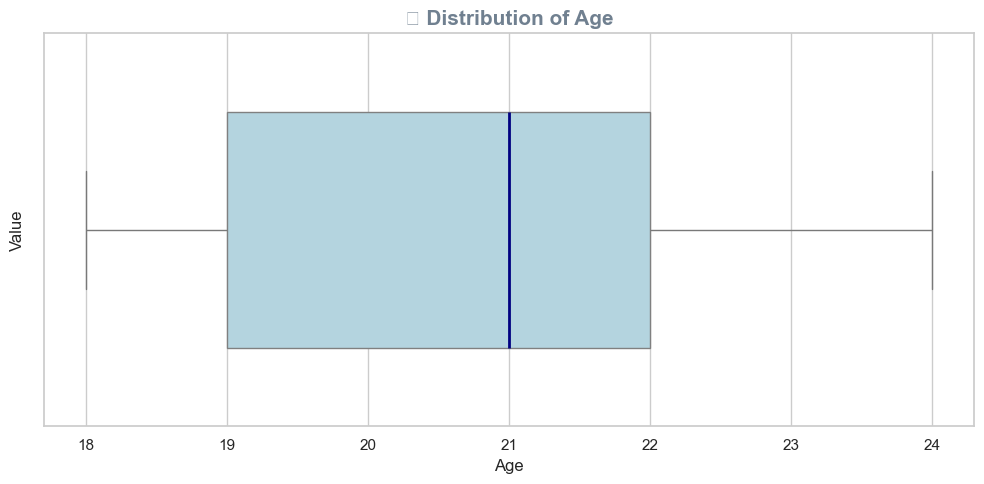

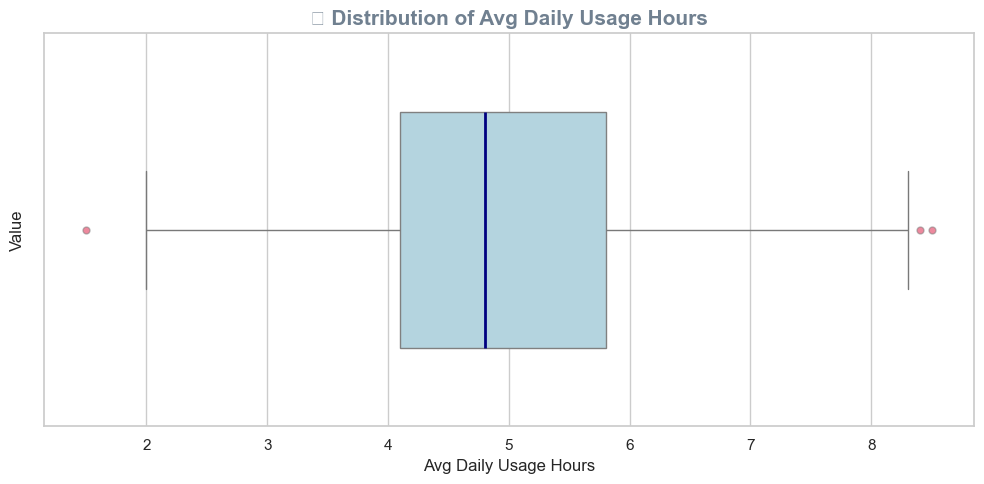

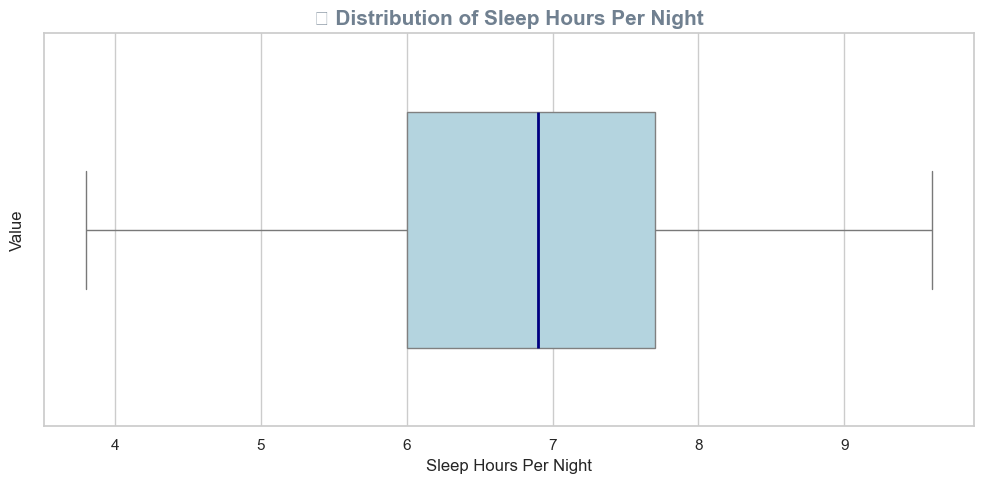

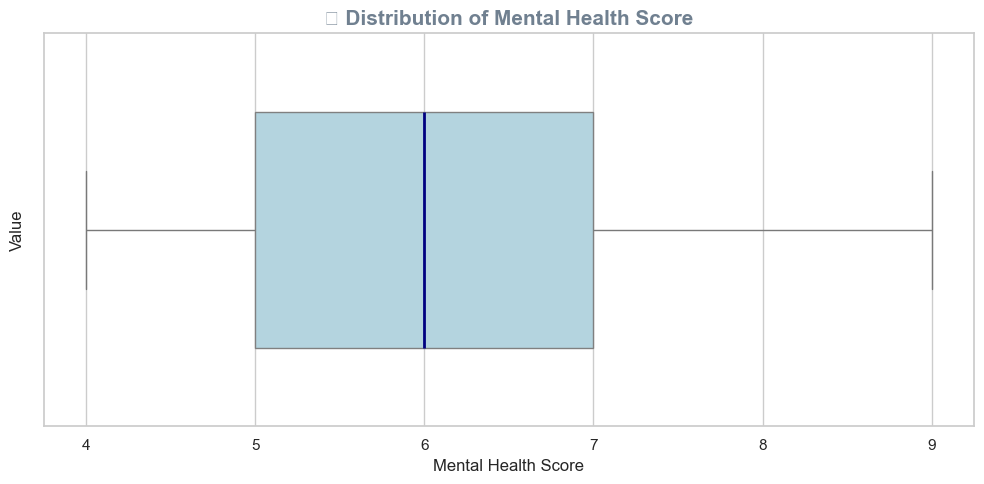

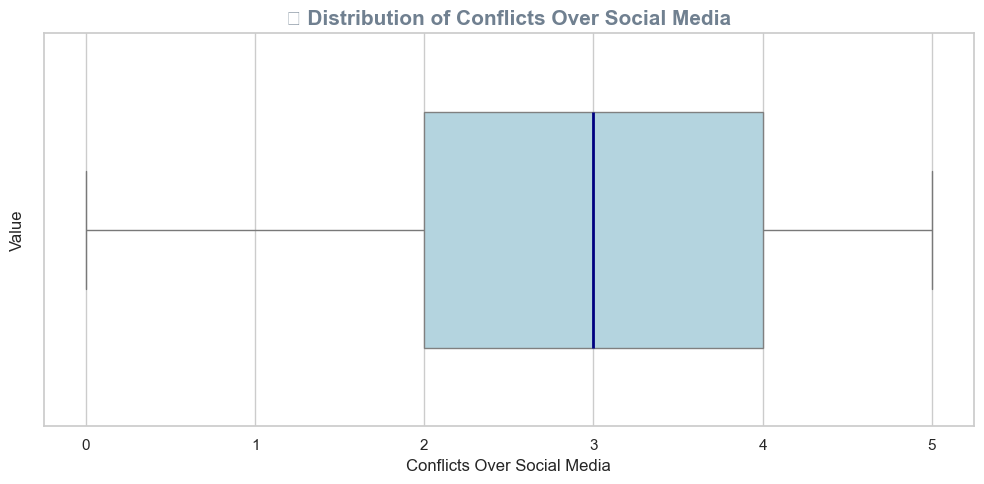

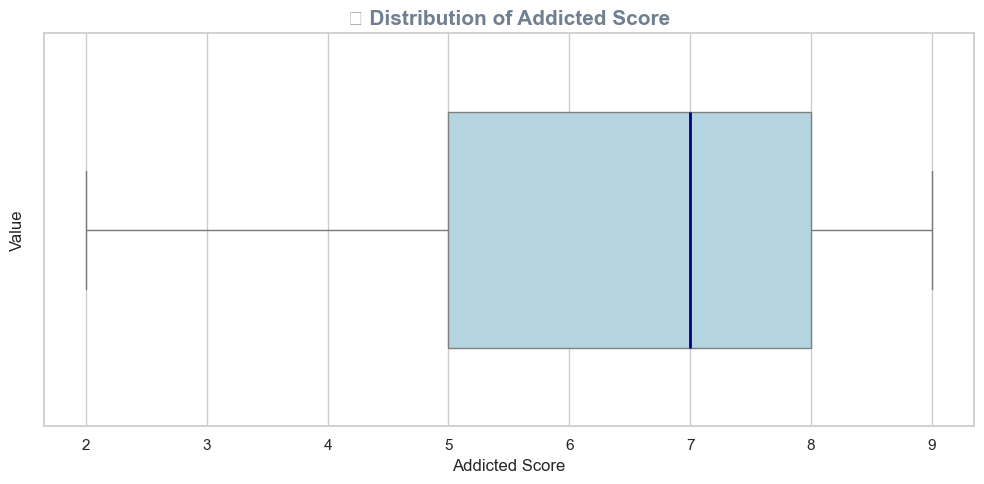

In [16]:
#Checkink for outliers in numeric columns
sns.set(style="whitegrid", palette="pastel")
exclude_cols = ["student_id", "gender", "academic_level", "country", "most_used_platform",
"affects_academic_performance", "relationship_status", "usage_category", "sleep_category"]
for i, predictor in enumerate(data.drop(columns=exclude_cols).columns, 1):
    plt.figure(figsize=(10, 5))    
    sns.boxplot(
        data=data,
        x=predictor,
        color="lightblue",
        width=0.6,
        boxprops=dict(edgecolor='gray'),
        medianprops=dict(color='navy', linewidth=2),
        flierprops=dict(marker='o', markersize=5, markerfacecolor='crimson', alpha=0.5)
    )

    plt.title(f"📦 Distribution of {predictor.replace('_', ' ').title()}", fontsize=15, fontweight='bold', color='slategray')
    plt.xlabel(predictor.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()

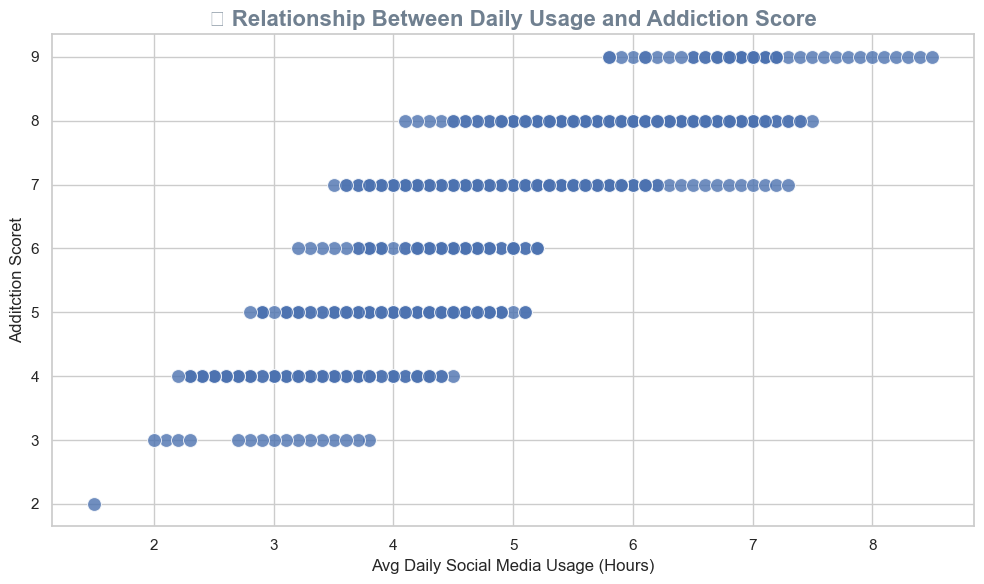

In [17]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", context="notebook")
sns.scatterplot(
    data=data,
    x="avg_daily_usage_hours",
    y="addicted_score",
    palette="Set2", 
    edgecolor='white',
    s=100, 
    alpha=0.8)
plt.title("💡 Relationship Between Daily Usage and Addiction Score", fontsize=16, fontweight='bold', color='slategray')
plt.xlabel("Avg Daily Social Media Usage (Hours)", fontsize=12)
plt.ylabel("Additction Scoret", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

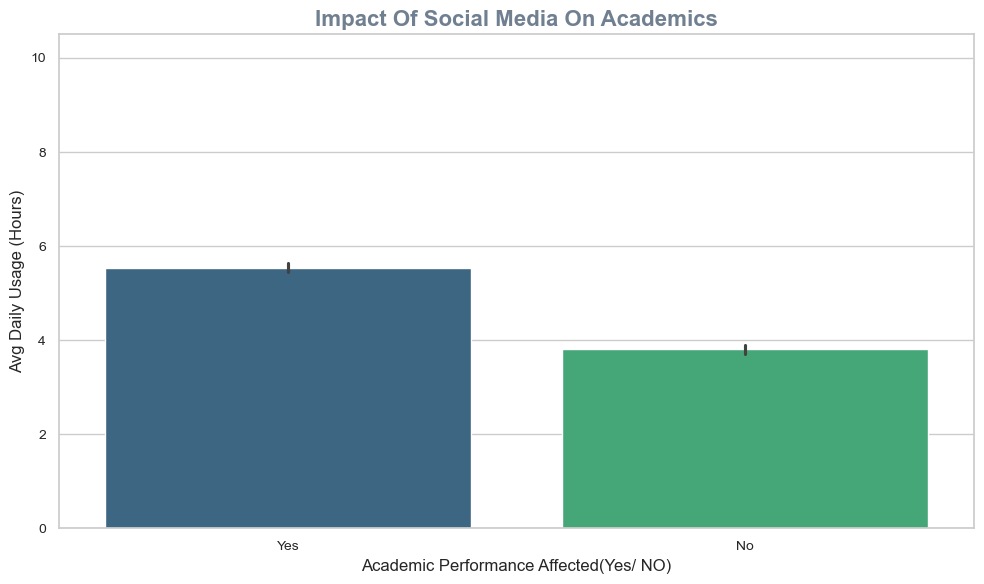

In [18]:
plt.figure(figsize = (10, 6))
sns.barplot(
    data=data,
    x="affects_academic_performance",
    y="avg_daily_usage_hours",
    palette="viridis")
plt.title("Impact Of Social Media On Academics", fontsize=16, fontweight='bold', color='slategray')
plt.xlabel("Academic Performance Affected(Yes/ NO)", fontsize=12)
plt.ylabel("Avg Daily Usage (Hours)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, data["avg_daily_usage_hours"].max() + 2)
plt.tight_layout()
plt.show()

In [19]:
data.head()

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score,usage_category,sleep_category
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,4-6,Good(6-8h)
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,2-4,Good(6-8h)
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,6-12,Moderate(4-6h)
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,2-4,Good(6-8h)
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,4-6,Moderate(4-6h)


In [20]:
data.to_excel('Students social Media Addiction_After_EDA.xlsx', index=False)

In [63]:
import pandas as pd
df = pd.read_excel("Students social Media Addiction_After_EDA.xlsx")
password = quote_plus("Sarvesh@8767384243")
username = "root"
host = "localhost"
port = 3306
database = "Project"
connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)
df.to_sql(
    name='socialmedia_addiction',
    con=engine,
    if_exists='replace',  
    index=False
)
print("done")

done
